In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224,224]

In [ ]:
train_directory = '/content/drive/MyDrive/Dataset/train'
test_directory = '/content/drive/MyDrive/Dataset/test'

In [ ]:
vgg  = VGG16(input_shape=IMAGE_SIZE +[3], weights='imagenet',include_top=False)

for layer in vgg.layers:
  layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/train/*')
len(folders)

11

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders),activation='softmax')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss= 'categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, # To rescaling the image in range of [0,1]
                                   shear_range = 0.2, # To randomly shear the images 
                                   zoom_range = 0.2, # To randomly zoom the images
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode= 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode= 'categorical')

Found 865 images belonging to 11 classes.
Found 105 images belonging to 11 classes.


In [ ]:
print(len(training_set))
print(len(test_set))

28
4


In [ ]:
r = model.fit_generator(training_set,validation_data=test_set,
                        epochs=5,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
28/28 [==============================] - 547s 19s/step - loss: 1.9450 - accuracy: 0.4994 - val_loss: 3.0508 - val_accuracy: 0.5048
Epoch 2/5
28/28 [==============================] - 510s 18s/step - loss: 0.8985 - accuracy: 0.7341 - val_loss: 1.5669 - val_accuracy: 0.5714
Epoch 3/5
28/28 [==============================] - 508s 18s/step - loss: 0.6847 - accuracy: 0.7780 - val_loss: 2.0475 - val_accuracy: 0.6286
Epoch 4/5
28/28 [==============================] - 509s 18s/step - loss: 0.7146 - accuracy: 0.7780 - val_loss: 1.1103 - val_accuracy: 0.6286
Epoch 5/5
28/28 [==============================] - 506s 18s/step - loss: 0.5139 - accuracy: 0.8416 - val_loss: 1.3591 - val_accuracy: 0.6286


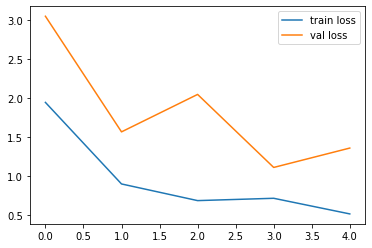

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()

In [ ]:
model.save('BC.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
model1 =load_model('./BC.h5',compile = False)

In [ ]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
print(lab)

{0: 'HealthyBadami', 1: 'HealthyTotapuri', 2: 'PartiallyRipeBadami', 3: 'PartiallyRipeTotapuri', 4: 'RawBadami', 5: 'RawTotapuri', 6: 'RottenBadami', 7: 'RottenNeelam', 8: 'RottenTotapuri', 9: 'UnripeBadami', 10: 'UnripeTotapuri'}


In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

'HealthyBadami'

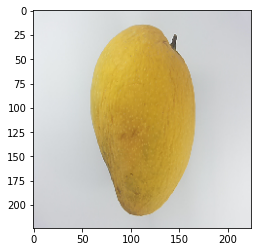

In [ ]:
img='/content/drive/MyDrive/Dataset/test/HealthyBadami/1 (1).jpg'
pic=load_img('/content/drive/MyDrive/Dataset/test/HealthyBadami/1 (1).jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [ ]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.8.0
2.8.0
